# IPW v2: `Re78` - `Re75`

In [1]:
import sys
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.bootstrap import bootstrap, bootstrap_experiment
from utils.prop_utils import ipw

In [3]:
lalonde_exp = pd.read_csv("../data/lalonde_exp.csv")
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [4]:
lalonde_exp["re78_re75"] = lalonde_exp["re78"] - lalonde_exp["re75"]
lalonde_obs["re78_re75"] = lalonde_obs["re78"] - lalonde_obs["re75"]

Our average treatment effect is now a difference of differences

$\beta = E[Y^a - Y^{a'}] = E[(Re_{78} - Re_{75})^{a} - (Re_{78} - Re_{75})^{a'}]$

## Experimental Data

In [5]:
ipw_results = bootstrap_experiment(
    df=lalonde_exp,
    function=ipw,
    num_exp=50,
    n=50,
    ci=95,
    treatment_col="treat",
    outcome_col="re78_re75",
    confounder_cols=[
        "age",
        "education",
        "black",
        "hispanic",
        "married",
        "re74",
        "re75",
    ],
)

Running experiments: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:31<00:00,  1.59it/s]


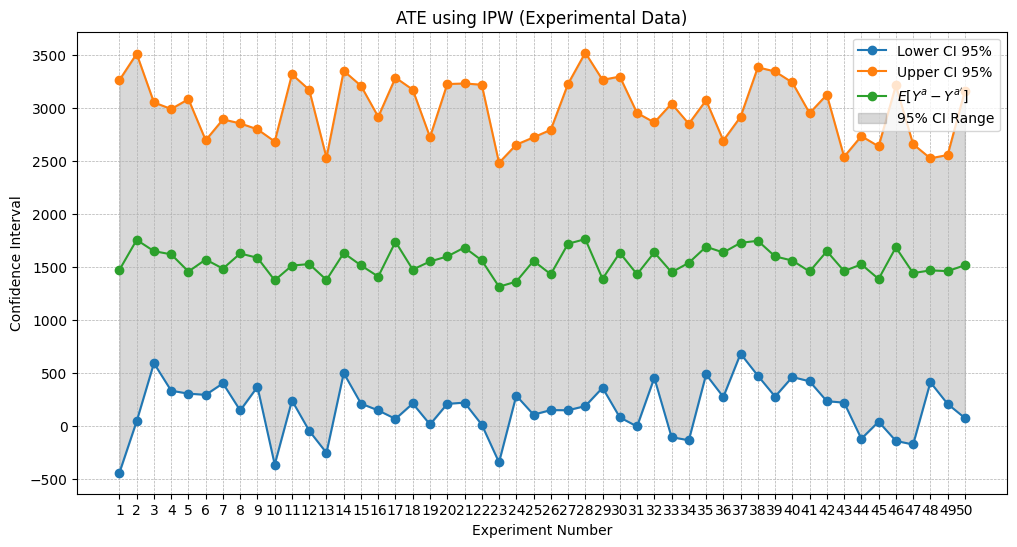

In [6]:
ci_df = pd.DataFrame(ipw_results, columns=["mean", "lower_ci", "upper_ci"])
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(12, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="$E[Y^a - Y^{a'}]$", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("ATE using IPW (Experimental Data)")
plt.legend()
plt.show()

## Observational Data

In [7]:
ipw_results = bootstrap_experiment(
    df=lalonde_obs,
    function=ipw,
    num_exp=50,
    n=50,
    ci=95,
    treatment_col="treat",
    outcome_col="re78_re75",
    confounder_cols=[
        "age",
        "education",
        "black",
        "hispanic",
        "married",
        "re74",
        "re75"
    ],
)

Running experiments: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:02<00:00,  3.65s/it]


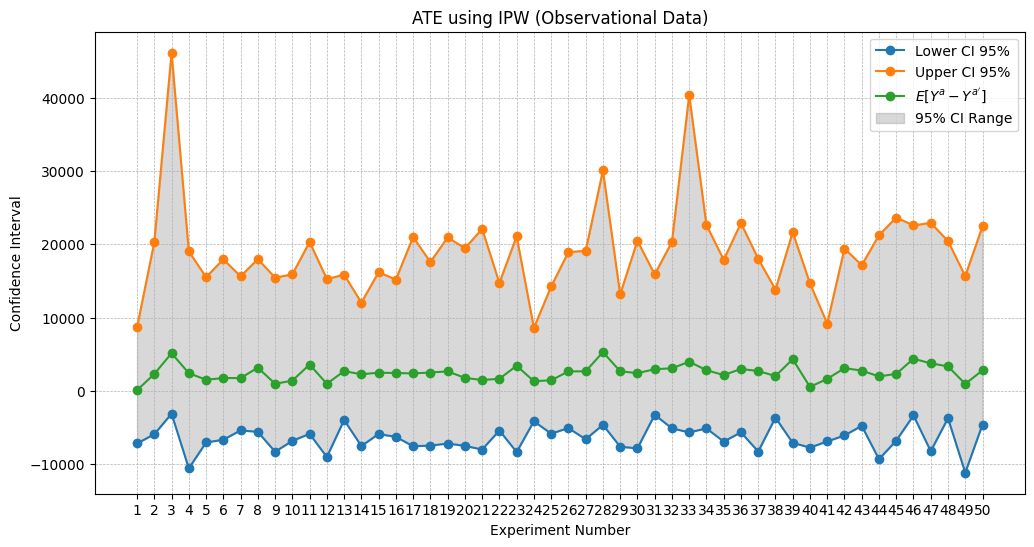

In [8]:
ci_df = pd.DataFrame(ipw_results, columns=["mean", "lower_ci", "upper_ci"])
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(12, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="$E[Y^a - Y^{a'}]$", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("ATE using IPW (Observational Data)")
plt.legend()
plt.show()

Albeit, still low, we're seeing a better estimate.

In [9]:
ci = bootstrap(
    lalonde_obs,
    ipw,
    50,
    95,
    treatment_col="treat",
    outcome_col="re78_re75",
    confounder_cols=[
        "age",
        "education",
        "black",
        "hispanic",
        "married",
        "re74",
        "re75",
    ],
)

print(
    f"Causal estimate of `Re78` - `Re75` in Observable data as a difference of means is "
    f"US${ci[0]:.2f} ± [{ci[1]:.2f}, {ci[2]:.2f}]"
)

Causal estimate of `Re78` - `Re75` in Observable data as a difference of means is US$2000.23 ± [-16544.84, 20828.44]
